# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name:Zak Davlin
https://github.com/zakdavlin/Mod-6

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [18]:
import requests
import pickle
r=requests.get('https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/')
#r is the html  doc
#code below dumps pull to pickle file
#then saves it 
with open('python-match.pkl','wb') as f:
    pickle.dump(r.text,f)
with open('python-match.pkl', 'rb') as f:
    htmldoc = pickle.load(f)

2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [3]:
import pickle
from bs4 import BeautifulSoup
with open ('python-match.pkl','rb') as f:
    htmldoc=pickle.load(f)
soup=BeautifulSoup(htmldoc,'html5lib')
text=soup.find('article')
print(text.get_text())




    
        How Laser Headlights Work
        
            
                130 Comments            
            
                by:
                Lewin Day
            
        

        
            March 22, 2021
            
                
                
            
        

        
    

    
        When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first i

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [15]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
import pickle
from bs4 import BeautifulSoup
from collections import Counter
with open ('python-match.pkl','rb') as f:
    htmldoc=pickle.load(f)
soup=BeautifulSoup(htmldoc,'html5lib')
text=soup.find('article')
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
doc=nlp(text.get_text())
def important_words(token):
    return not (token.is_space or token.is_punct or token.is_stop)

important_tokens = [token for token in doc if important_words(token)]

lowercase_important_tokens=[token.text.lower() for token in important_tokens]
word_freq= Counter(map(str,lowercase_important_tokens))
print (word_freq.most_common(5))

[('laser', 35), ('headlights', 19), ('headlight', 11), ('technology', 10), ('led', 10)]


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [24]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
import pickle
from bs4 import BeautifulSoup
from collections import Counter
with open ('python-match.pkl','rb') as f:
    htmldoc=pickle.load(f)
soup=BeautifulSoup(htmldoc,'html5lib')
text=soup.find('article')
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
doc=nlp(text.get_text())

def important_words(token):
    return not (token.is_space or token.is_punct or token.is_stop)
important_lemmas=[token.lemma_.lower() for token in doc if important_words(token)]
lemma_freq=Counter(important_lemmas)
print(lemma_freq.most_common(5))


[('laser', 40), ('headlight', 28), ('beam', 12), ('led', 11), ('technology', 10)]


5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [12]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
import pickle
from bs4 import BeautifulSoup
from collections import Counter
with open ('python-match.pkl','rb') as f:
    htmldoc=pickle.load(f)
soup=BeautifulSoup(htmldoc,'html5lib')
text=soup.find('article')
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
doc=nlp(text.get_text())

def important_words(token):
    return not (token.is_space or token.is_punct or token.is_stop)

token_freq=Counter(map(str,important_tokens))
important_tokens = set()
for token, freq in token_freq.most_common(5):
    important_tokens.add(token)


important_lemmas=[token.lemma_.lower() for token in doc if important_words(token)]

lemma_freq=Counter(important_lemmas)

important_lemmas = set()
for lemma, freq in lemma_freq.most_common(5):
    important_lemmas.add(lemma)




def score_sentence_by_token(sentence, interesting_token):
    sentence1=nlp(sentence)
    count = 0
    count2 = 0
    for token in sentence1:
        if token.text.lower() in interesting_token:
            count +=1
    for token in sentence1:
        if not(token.is_space or token.is_punct):
            count2 += 1
    return "Sentence Token Score", count/count2


def score_sentence_by_lemma(sentence, interesting_lemmas):
    sentence1=nlp(sentence)
    count=0
    count2=0
    for token in sentence1:
        if token.lemma_.lower()in interesting_lemmas:
            count+=1
        if not(token.is_space or token.is_punct):
            count2 += 1
    return "Sentence Lemma Score", count/count2


print(score_sentence_by_token("When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind.",important_tokens))
print(score_sentence_by_lemma("When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind.",important_lemmas))


('Sentence Token Score', 0.09523809523809523)
('Sentence Lemma Score', 0.09523809523809523)


6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

[Text(0.5, 0, 'TokenScores'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Token Score histogram')]

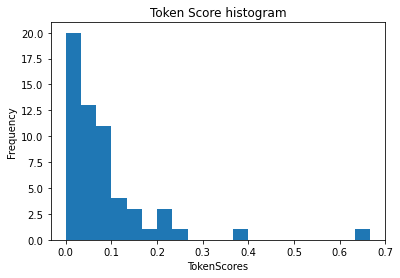

In [9]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
import pickle
from bs4 import BeautifulSoup
from collections import Counter
with open ('python-match.pkl','rb') as f:
    htmldoc=pickle.load(f)
soup=BeautifulSoup(htmldoc,'html5lib')
text=soup.find('article')
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
doc=nlp(text.get_text())

def important_words(token):
    return not (token.is_space or token.is_punct or token.is_stop)

token_freq=Counter(map(str,important_tokens))
important_tokens = set()
for token, freq in token_freq.most_common(5):
    important_tokens.add(token)

important_lemmas=[token.lemma_.lower() for token in doc if important_words(token)]

lemma_freq=Counter(important_lemmas)

important_lemmas = set()
for lemma, freq in lemma_freq.most_common(5):
    important_lemmas.add(lemma)

def score_sentence_by_token(sentence1, interesting_token):
    count = 0
    count2 = 1
    for token in sentence1:
        if token.text.lower() in interesting_token:
            count +=1
    for token in sentence1:
        if not(token.is_space or token.is_punct):
            count2 += 1
    return count/count2


def score_sentence_by_lemma(sentence1, interesting_lemmas):
    count=0
    count2=1
    for token in sentence1:
        if token.lemma_.lower()in interesting_lemmas:
            count+=1
        if not(token.is_space or token.is_punct):
            count2 += 1
    return count/count2

List_of_token_scores=[]
sentence_numbers=[]
for i in doc.sents:
    List_of_token_scores.append(score_sentence_by_token(i,important_tokens))

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
fig, ax=plt.subplots()
ax.hist(List_of_token_scores,bins=20)
labels=ax.get_xticklabels()
ax.set(xlabel='TokenScores',ylabel='Frequency',title='Token Score histogram')



The most common range for scores is between 0 and .02!

7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

[Text(0.5, 0, 'LemmaScores'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Lemma Score histogram')]

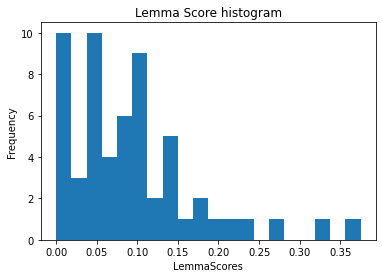

In [14]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
import pickle
from bs4 import BeautifulSoup
from collections import Counter
with open ('python-match.pkl','rb') as f:
    htmldoc=pickle.load(f)
soup=BeautifulSoup(htmldoc,'html5lib')
text=soup.find('article')
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
doc=nlp(text.get_text())

def important_words(token):
    return not (token.is_space or token.is_punct or token.is_stop)
token_freq=Counter(map(str,important_tokens))
important_tokens = set()
for token, freq in token_freq.most_common(5):
    important_tokens.add(token)

important_lemmas=[token.lemma_.lower() for token in doc if important_words(token)]

lemma_freq=Counter(important_lemmas)

important_lemmas = set()
for lemma, freq in lemma_freq.most_common(5):
    important_lemmas.add(lemma)

def score_sentence_by_token(sentence1, interesting_token):
    count = 0
    count2 = 1
    for token in sentence1:
        if token.text.lower() in interesting_token:
            count +=1
    for token in sentence1:
        if not(token.is_space or token.is_punct):
            count2 += 1
    return count/count2


def score_sentence_by_lemma(sentence1, interesting_lemmas):
    count=0
    count2=1
    for token in sentence1:
        if token.lemma_.lower()in interesting_lemmas:
            count+=1
        if not(token.is_space or token.is_punct):
            count2 += 1
    return count/count2

List_of_lemma_scores=[]
sentence_numbers=[]
for i in doc.sents:
    List_of_lemma_scores.append(score_sentence_by_lemma(i,important_lemmas))
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
fig, ax=plt.subplots()
ax.hist(List_of_lemma_scores,bins=20)
labels=ax.get_xticklabels()
ax.set(xlabel='LemmaScores',ylabel='Frequency',title='Lemma Score histogram')

The most common score is around .05 or 0

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

Actually all of the words are nouns in questions 3 and 4 so the lists would not change. To change the code we could use spacy text.pos and create an if statement that checks text.pos==noun. We could just add this condtion to our interesting words and capture only the nouns.I demo a code like this below.


In [119]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
import pickle
from bs4 import BeautifulSoup
from collections import Counter
with open ('python-match.pkl','rb') as f:
    htmldoc=pickle.load(f)
soup=BeautifulSoup(htmldoc,'html5lib')
text=soup.find('article')
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
doc=nlp(text.get_text())

def important_words(token):
        return not (token.is_space or token.is_punct or token.is_stop)
important_lemmas=[token.lemma_.lower() for token in doc if important_words(token) and token.pos_=="NOUN"]
lemma_freq=Counter(important_lemmas)
print(lemma_freq.most_common(5))


[('laser', 34), ('headlight', 25), ('beam', 12), ('led', 11), ('technology', 10)]
